# Parallel Categories With Plotly Graph Objects

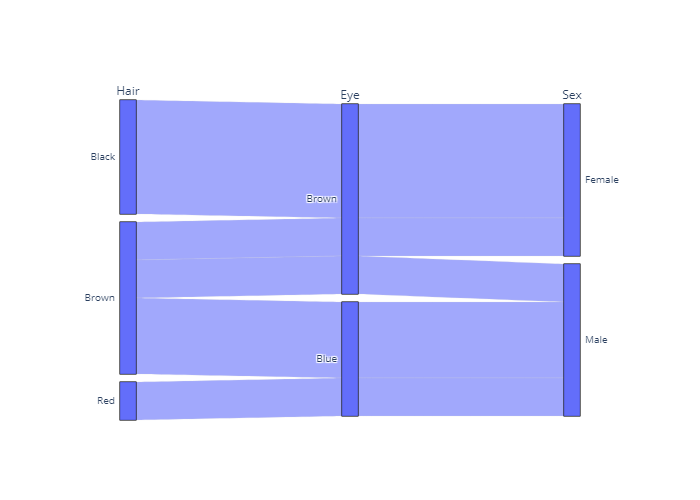

In [2]:
import plotly.graph_objects as go

go.Figure(go.Parcats(
    dimensions=[
        {'label': 'Hair', # Column Name
         'values': ['Black', 'Black', 'Black', 'Brown', 'Brown', 'Brown', 'Red', 'Brown']}, # Rows
        {'label': 'Eye',
         'values': ['Brown', 'Brown', 'Brown', 'Brown', 'Brown', 'Blue', 'Blue', 'Blue']},
        {'label': 'Sex',
         'values': ['Female', 'Female', 'Female', 'Male', 'Female', 'Male', 'Male', 'Male']}]
))

## Counts

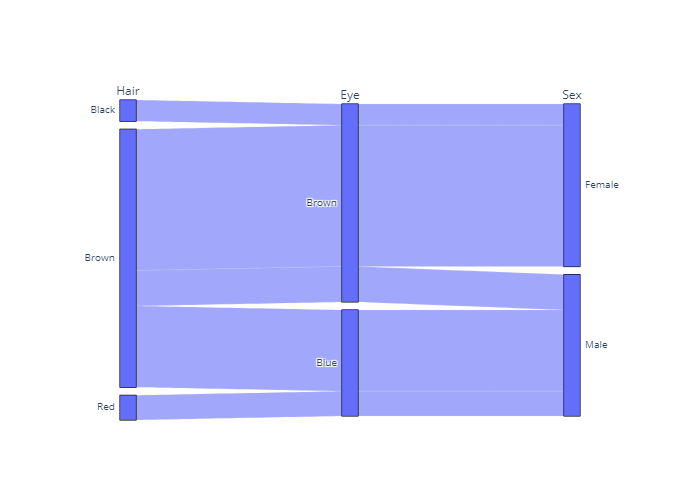

In [3]:
import plotly.graph_objects as go

go.Figure(go.Parcats(
    dimensions=[
        {'label': 'Hair',
         'values': ['Black', 'Brown', 'Brown', 'Brown', 'Red']},
        {'label': 'Eye',
         'values': ['Brown', 'Brown', 'Brown', 'Blue', 'Blue']},
        {'label': 'Sex',
         'values': ['Female', 'Male', 'Female', 'Male', 'Male']}],
    counts=[6, 10, 40, 23, 7]
))

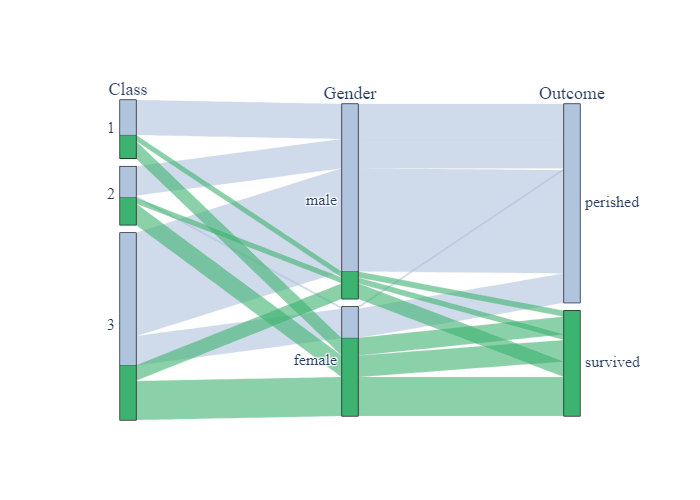

In [4]:
import plotly.graph_objects as go
import pandas as pd

titanic_df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/titanic.csv")

# Create dimensions
class_dim = go.parcats.Dimension(
    values        = titanic_df.Pclass,
    categoryorder = 'category ascending', 
    label         = "Class"
)

gender_dim = go.parcats.Dimension(
    values= titanic_df.Sex, 
    label = "Gender"
)

survival_dim = go.parcats.Dimension(
    values       = titanic_df.Survived, 
    label        = "Outcome", 
    categoryarray= [0, 1],
    ticktext     = ['perished', 'survived']
)

# Create parcats trace
color      = titanic_df.Survived
colorscale = [[0, 'lightsteelblue'], [1, 'mediumseagreen']];

go.Figure(data = [go.Parcats(
    dimensions  = [class_dim, gender_dim, survival_dim],
    line        = {'color': color, 'colorscale': colorscale},
    hoveron     = 'color',
    hoverinfo   = 'count+probability',
    labelfont   = {'size': 18, 'family': 'Times'},
    tickfont    = {'size': 16, 'family': 'Times'},
    arrangement = 'freeform'
)])

## Linked Brushing - Filter Using Scatter Plot

In [5]:
import plotly.graph_objects as go
from ipywidgets import widgets
import pandas as pd
import numpy as np

cars_df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/imports-85.csv')

# Build parcats dimensions
categorical_dimensions = ['body-style', 'drive-wheels', 'fuel-type'];

dimensions = [dict(values=cars_df[label], label=label) for label in categorical_dimensions]

# Build colorscale
color = np.zeros(len(cars_df), dtype='uint8')
colorscale = [[0, 'gray'], [1, 'firebrick']]

# Build figure as FigureWidget
fig = go.FigureWidget(
    data=[go.Scatter(x=cars_df.horsepower, y=cars_df['highway-mpg'],
    marker={'color': 'gray'}, mode='markers', selected={'marker': {'color': 'firebrick'}},
    unselected={'marker': {'opacity': 0.3}}), go.Parcats(
        domain={'y': [0, 0.4]}, dimensions=dimensions,
        line={'colorscale': colorscale, 'cmin': 0,
              'cmax': 1, 'color': color, 'shape': 'hspline'})
    ])

fig.update_layout(
        height=800, xaxis={'title': 'Horsepower'},
        yaxis={'title': 'MPG', 'domain': [0.6, 1]},
        dragmode='lasso', hovermode='closest')

# Update color callback
def update_color(trace, points, state):
    # Update scatter selection
    fig.data[0].selectedpoints = points.point_inds

    # Update parcats colors
    new_color = np.zeros(len(cars_df), dtype='uint8')
    new_color[points.point_inds] = 1
    fig.data[1].line.color = new_color

# Register callback on scatter selection...
fig.data[0].on_selection(update_color)
# and parcats click
fig.data[1].on_click(update_color)

fig

FigureWidget({
    'data': [{'marker': {'color': 'gray'},
              'mode': 'markers',
              'sele…

In [6]:
import plotly.graph_objects as go
import ipywidgets as widgets
import pandas as pd
import numpy as np

cars_df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/imports-85.csv')

# Build parcats dimensions
categorical_dimensions = ['body-style', 'drive-wheels', 'fuel-type']

dimensions = [dict(values=cars_df[label], label=label) for label in categorical_dimensions]

# Build colorscale
color = np.zeros(len(cars_df), dtype='uint8')
colorscale = [[0, 'gray'], [0.33, 'gray'],
              [0.33, 'firebrick'], [0.66, 'firebrick'],
              [0.66, 'blue'], [1.0, 'blue']]
cmin = -0.5
cmax = 2.5

# Build figure as FigureWidget
fig = go.FigureWidget(
    data=[go.Scatter(x=cars_df.horsepower, y=cars_df['highway-mpg'],
                marker={'color': color, 'cmin': cmin, 'cmax': cmax,
                        'colorscale': colorscale, 'showscale': True,
                        'colorbar': {'tickvals': [0, 1, 2], 'ticktext': ['None', 'Red', 'Blue']}},
                     mode='markers'),

      go.Parcats(domain={'y': [0, 0.4]}, dimensions=dimensions,
                   line={'colorscale': colorscale, 'cmin': cmin,
                   'cmax': cmax, 'color': color, 'shape': 'hspline'})]
)

fig.update_layout(height=800, xaxis={'title': 'Horsepower'},
                  yaxis={'title': 'MPG', 'domain': [0.6, 1]},
                  dragmode='lasso', hovermode='closest')

# Build color selection widget
color_toggle = widgets.ToggleButtons(
    options=['None', 'Red', 'Blue'],
    index=1, description='Brush Color:', disabled=False)

# Update color callback
def update_color(trace, points, state):
    # Compute new color array
    new_color = np.array(fig.data[0].marker.color)
    new_color[points.point_inds] = color_toggle.index

    with fig.batch_update():
        # Update scatter color
        fig.data[0].marker.color = new_color

        # Update parcats colors
        fig.data[1].line.color = new_color

# Register callback on scatter selection...
fig.data[0].on_selection(update_color)
# and parcats click
fig.data[1].on_click(update_color)

# Display figure
widgets.VBox([color_toggle, fig])